## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools

## Getting the data

In [2]:
ad_data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
ad_data.shape

(400, 5)

In [4]:
ad_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


** Resetting the index to User ID **

In [5]:
ad_data.set_index('User ID', inplace=True)

In [6]:
ad_data.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


In [7]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 15624510 to 15594041
Data columns (total 4 columns):
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3), object(1)
memory usage: 15.6+ KB


In [8]:
ad_data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [9]:
ad_data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Exploratory Data Analysis

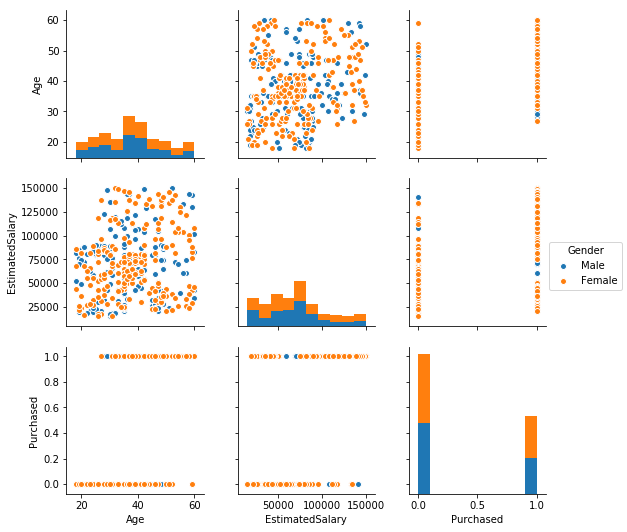

In [10]:
sns.pairplot(ad_data, hue="Gender")

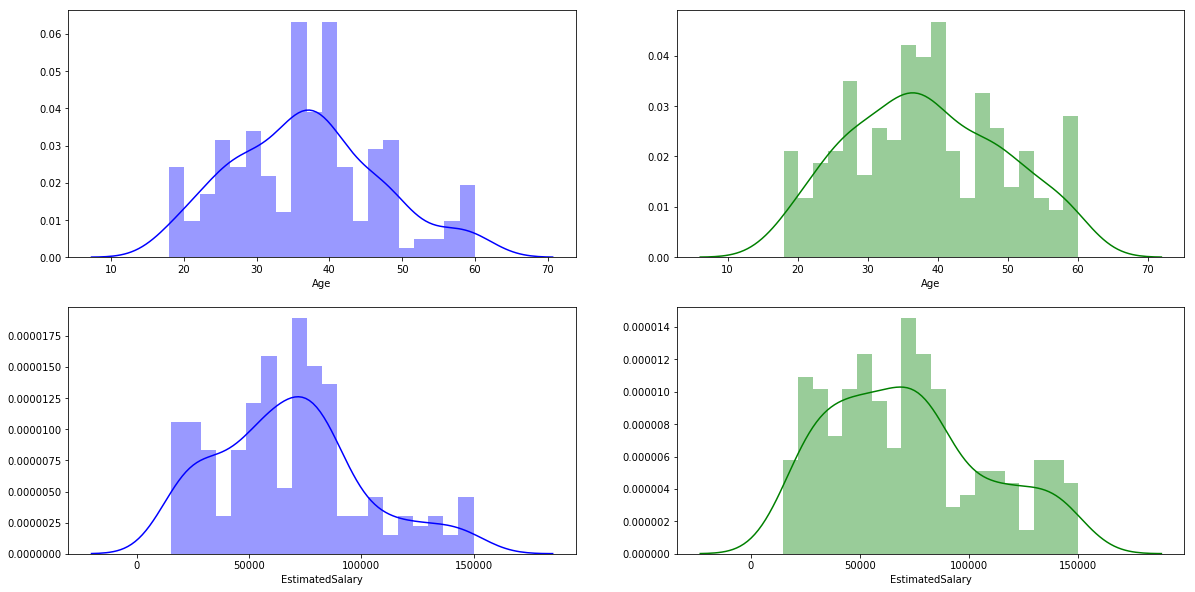

In [11]:
fig, (ax1, ax2) = plt.subplots(2,2, figsize=(20, 10))
sns.distplot(ad_data.loc[ad_data['Gender'] == 'Male']['Age'], ax=ax1[0], bins=20, color="blue")
sns.distplot(ad_data.loc[ad_data['Gender'] == 'Male']['EstimatedSalary'], ax=ax2[0], bins=20, color="blue")

sns.distplot(ad_data.loc[ad_data['Gender'] == 'Female']['Age'], ax=ax1[1], bins=20, color="green")
sns.distplot(ad_data.loc[ad_data['Gender'] == 'Female']['EstimatedSalary'], ax=ax2[1], bins=20, color="green")


The plots show that the age and estimated salary have fairly a normal distribution

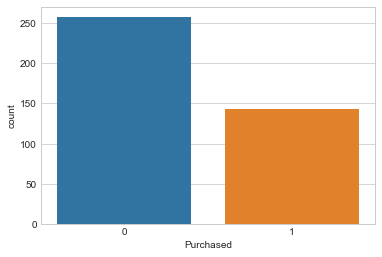

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased',data=ad_data)

It is observed that the purchases are lesser in number 

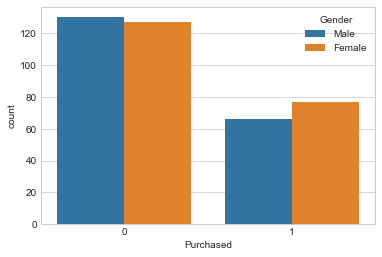

In [13]:
sns.countplot(x='Purchased',data=ad_data, hue="Gender")

Among the purchases, it's observed that females are more likely to purchase than the male counterpart

### Transformations

We have continuous information in variables like age and estimated salary. For Logistic regression, we need to convert these continuous data into categories (categorical data)

** Age ** : We shall divide the ages into four groups : (0 - 20), (21 - 40), (41 - 60) and (above 60). For this we define a mapper function which returns the age group based on numeric input

In [14]:
def group_age(x):
    if (x < 21) : 
        return "<20"
    elif (x > 20 and x < 41) : 
        return "21 - 40"
    elif (x > 40 and x < 61) : 
        return "41 - 60"
    else : 
        return "60+"

Apply the mapper function to get the respective age groups

In [15]:
ad_data['AgeGroups'] = ad_data['Age'].apply(lambda x: group_age(x))

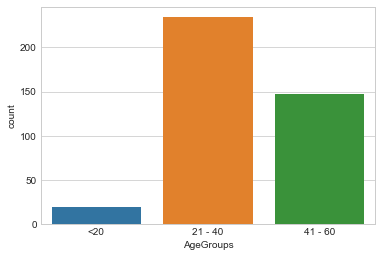

In [16]:
sns.countplot(x='AgeGroups',data=ad_data)

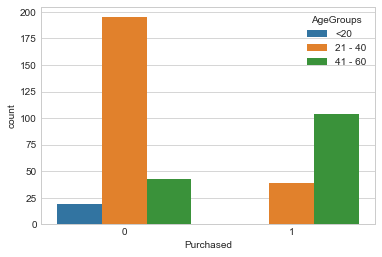

In [17]:
sns.countplot(x='Purchased',data=ad_data, hue="AgeGroups")

We see that there are no purchases by people who are below 21. There are higher amount of 'no-purchases' in age group 21- 40. Finally, people in age group 41-60 exhibit higher tendency to purchase.

** Transforming Estimated Salary ** - We can safely divide the salary by 1000 to reduce the range 

In [18]:
ad_data['EstimatedSalary1000'] = ad_data['EstimatedSalary'] / 1000

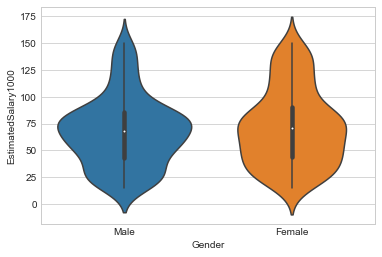

In [19]:
sns.violinplot(x='Gender', y='EstimatedSalary1000', data=ad_data)

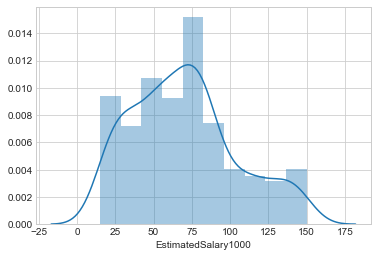

In [20]:
sns.distplot(ad_data['EstimatedSalary1000'], bins = 10)

We observe that majority of the customers fall in the income around $75K

In [21]:
# Calculating the bounds for the salary range
print ("Min: ", ad_data['EstimatedSalary1000'].min(), " / Max :", ad_data['EstimatedSalary1000'].max())

Min:  15.0  / Max : 150.0


We shall divide the income groups into 10 equaly spaced bins

In [22]:
num_bins = 10
salary_bins = np.linspace(15, 150, num_bins).astype(dtype="int")
ad_data['EstSalaryBracket'] = pd.cut(ad_data.EstimatedSalary1000, bins=salary_bins, labels=np.arange(1,num_bins))
ad_data['SalaryBin'] = pd.cut(ad_data.EstimatedSalary1000, salary_bins, include_lowest=True)

In [23]:
ad_data.head()

,Gender,Age,EstimatedSalary,Purchased,AgeGroups,EstimatedSalary1000,EstSalaryBracket,SalaryBin
User ID,,,,,,,,
15624510,Male,19,19000,0,<20,19.0,1,"(14.999, 30.0]"
15810944,Male,35,20000,0,21 - 40,20.0,1,"(14.999, 30.0]"
15668575,Female,26,43000,0,21 - 40,43.0,2,"(30.0, 45.0]"
15603246,Female,27,57000,0,21 - 40,57.0,3,"(45.0, 60.0]"
15804002,Male,19,76000,0,<20,76.0,5,"(75.0, 90.0]"


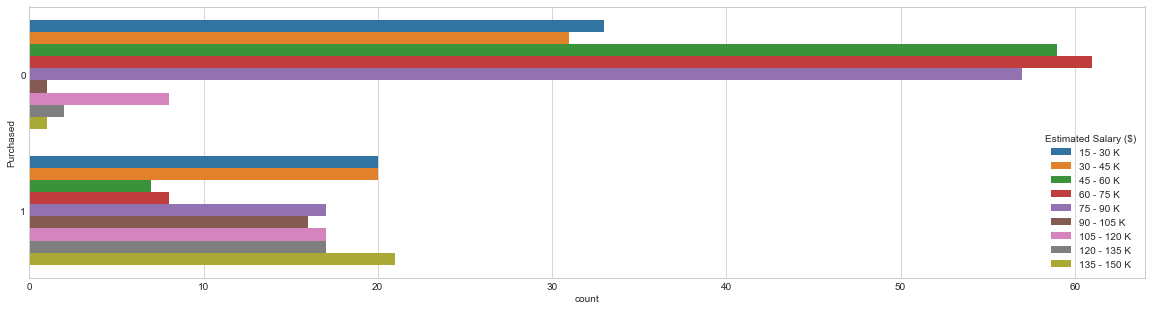

In [24]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(y="Purchased", hue="EstSalaryBracket", data=ad_data, ax=ax)

handles, labels = ax.get_legend_handles_labels()

x = np.linspace(15, 150, 10).astype(dtype="int")
for i in range(num_bins-1):
    labels[i] = ' '.join([str(x[i]), '-', str(x[i+1]), 'K'])

ax.legend(handles, labels)
ax.get_legend().set_title('Estimated Salary ($)')

The observations suggest that higher income groups [ \$90K - \$150K ] are more likely to purchase the product than the lower income groups.

### Dummy Variables

We need to create dummy variables for age and estimated salary. We shall use the age groups and estimated salary brackets to compute these dummy variables. 

In [25]:
ad_data_dummies = pd.get_dummies(ad_data, columns=['Gender', 'AgeGroups', 'EstSalaryBracket'])

In [26]:
ad_data_dummies.head()

,Age,EstimatedSalary,Purchased,EstimatedSalary1000,SalaryBin,Gender_Female,Gender_Male,AgeGroups_21 - 40,AgeGroups_41 - 60,AgeGroups_<20,EstSalaryBracket_1,EstSalaryBracket_2,EstSalaryBracket_3,EstSalaryBracket_4,EstSalaryBracket_5,EstSalaryBracket_6,EstSalaryBracket_7,EstSalaryBracket_8,EstSalaryBracket_9
User ID,,,,,,,,,,,,,,,,,,,
15624510,19,19000,0,19.0,"(14.999, 30.0]",0,1,0,0,1,1,0,0,0,0,0,0,0,0
15810944,35,20000,0,20.0,"(14.999, 30.0]",0,1,1,0,0,1,0,0,0,0,0,0,0,0
15668575,26,43000,0,43.0,"(30.0, 45.0]",1,0,1,0,0,0,1,0,0,0,0,0,0,0
15603246,27,57000,0,57.0,"(45.0, 60.0]",1,0,1,0,0,0,0,1,0,0,0,0,0,0
15804002,19,76000,0,76.0,"(75.0, 90.0]",0,1,0,0,1,0,0,0,0,1,0,0,0,0


** Dropping columns which are transformed (not required for analysis)**

In [27]:
ad_data_dummies.drop(['Age','EstimatedSalary','EstimatedSalary1000', 'SalaryBin'],axis=1,inplace=True)
ad_data_dummies.columns

Index(['Purchased', 'Gender_Female', 'Gender_Male', 'AgeGroups_21 - 40',
       'AgeGroups_41 - 60', 'AgeGroups_<20', 'EstSalaryBracket_1',
       'EstSalaryBracket_2', 'EstSalaryBracket_3', 'EstSalaryBracket_4',
       'EstSalaryBracket_5', 'EstSalaryBracket_6', 'EstSalaryBracket_7',
       'EstSalaryBracket_8', 'EstSalaryBracket_9'],
      dtype='object')

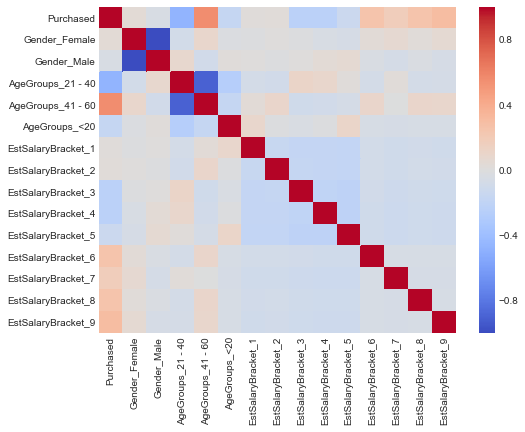

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(ad_data_dummies.corr(), cmap='coolwarm') 

## Slicing the data

In [29]:
p = list(ad_data_dummies.columns) #Getting all the columns from the dataframe
p.remove('Purchased') #Removing the target column from the list of columns
X = ad_data_dummies[p]

In [30]:
y = ad_data_dummies['Purchased'] #Setting target variable to Purchased

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state = 56)

## Visualization of Training and Test dataset

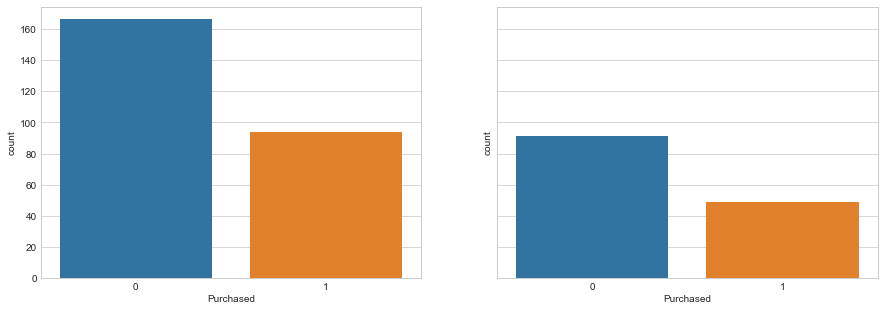

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(x=y_train, ax=ax1)
sns.countplot(x=y_test,  ax=ax2)

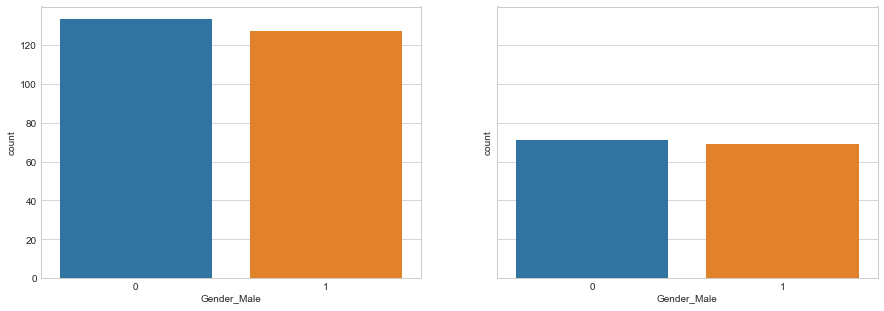

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(x='Gender_Male', data=X_train, ax=ax1)
sns.countplot(x='Gender_Male', data=X_test, ax=ax2)

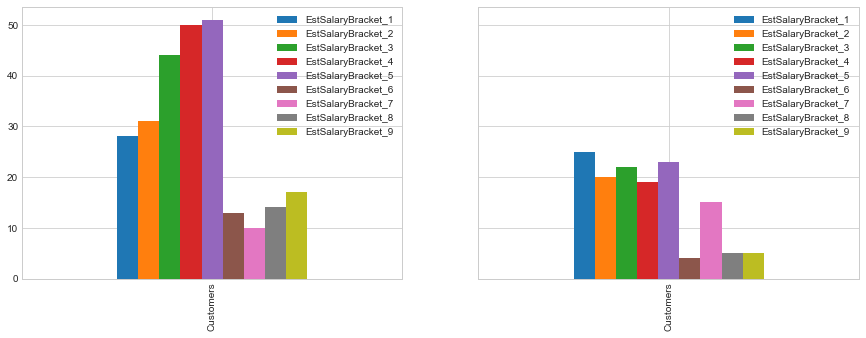

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

pd.DataFrame({ 'EstSalaryBracket_1' :X_train['EstSalaryBracket_1'].sum(), 
               'EstSalaryBracket_2' :X_train['EstSalaryBracket_2'].sum(),
               'EstSalaryBracket_3' :X_train['EstSalaryBracket_3'].sum(),
               'EstSalaryBracket_4' :X_train['EstSalaryBracket_4'].sum(),
               'EstSalaryBracket_5' :X_train['EstSalaryBracket_5'].sum(),
               'EstSalaryBracket_6' :X_train['EstSalaryBracket_6'].sum(),
               'EstSalaryBracket_7' :X_train['EstSalaryBracket_7'].sum(),
               'EstSalaryBracket_8' :X_train['EstSalaryBracket_8'].sum(),
               'EstSalaryBracket_9' :X_train['EstSalaryBracket_9'].sum()}, index=['Customers']).plot.bar(ax = ax1)

pd.DataFrame({ 'EstSalaryBracket_1' :X_test['EstSalaryBracket_1'].sum(), 
               'EstSalaryBracket_2' :X_test['EstSalaryBracket_2'].sum(),
               'EstSalaryBracket_3' :X_test['EstSalaryBracket_3'].sum(),
               'EstSalaryBracket_4' :X_test['EstSalaryBracket_4'].sum(),
               'EstSalaryBracket_5' :X_test['EstSalaryBracket_5'].sum(),
               'EstSalaryBracket_6' :X_test['EstSalaryBracket_6'].sum(),
               'EstSalaryBracket_7' :X_test['EstSalaryBracket_7'].sum(),
               'EstSalaryBracket_8' :X_test['EstSalaryBracket_8'].sum(),
               'EstSalaryBracket_9' :X_test['EstSalaryBracket_9'].sum()}, index=['Customers']).plot.bar(ax = ax2)
                        

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lg = LogisticRegression()

In [38]:
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
predictions = lg.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91        91
          1       0.90      0.73      0.81        49

avg / total       0.88      0.88      0.88       140



## Plotting Receiver Operating Characteristic (ROC) curve

In statistics, a receiver operating characteristic curve, i.e. ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

In [42]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

preds = lg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

0.94191522763


(0.0, 1.05)

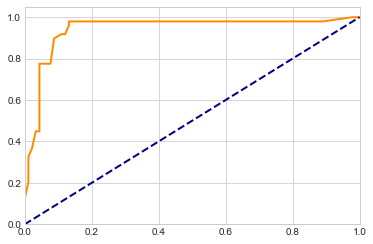

In [43]:
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Testing effect of randomization seed for training & test data set on model fit

Holding the test and training size constant, it is observed that the score for the model changes based on the value of parameter random_state. The parameter is significant in ramdomizing the test and the train dataset. 

We shall define a function which creates logistic models for a range of the random_state values. For each of the logistic models we shall compute the model fitness with respect to predictions v/s test data. We shall use F-1 score, precision and recall for evaluation purposes. 

In [44]:
def logisitics(index) :
    lg2 = LogisticRegression() #Creating logisitic regression model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state = index) #Dividing the data set 
    lg2.fit(X_train, y_train) #Fit the data 
    predictions = lg.predict(X_test) # Calculate predictions on test data
    df = pd.DataFrame([metrics.precision_recall_fscore_support(y_test,predictions)],  # Compute metrics on predictions v/s y-test
                      columns=['Precision', 'Recall', 'F1-Score', 'Support'])
    return df

In [45]:
df = pd.concat([logisitics(i) for i in range(200)], ignore_index=True)

In [46]:
df.head()

,Precision,Recall,F1-Score,Support
0,"[0.912087912088, 0.877551020408]","[0.932584269663, 0.843137254902]","[0.922222222222, 0.86]","[89, 51]"
1,"[0.877777777778, 0.86]","[0.918604651163, 0.796296296296]","[0.897727272727, 0.826923076923]","[86, 54]"
2,"[0.89247311828, 0.808510638298]","[0.902173913043, 0.791666666667]","[0.897297297297, 0.8]","[92, 48]"
3,"[0.943820224719, 0.823529411765]","[0.903225806452, 0.893617021277]","[0.923076923077, 0.857142857143]","[93, 47]"
4,"[0.927083333333, 0.909090909091]","[0.956989247312, 0.851063829787]","[0.941798941799, 0.879120879121]","[93, 47]"


** Splitting the values in each column for '0' and '1' **

In [47]:
df[['Precision_0','Precision_1']] = pd.DataFrame(df.Precision.values.tolist(), index= df.index)
df[['Recall_0','Recall_1']] = pd.DataFrame(df.Recall.values.tolist(), index= df.index)
df[['F1-Score_0','F1-Score_1']] = pd.DataFrame(df['F1-Score'].values.tolist(), index= df.index)
df[['Support_0','Support_1']] = pd.DataFrame(df.Support.values.tolist(), index= df.index)

In [48]:
df.drop(['Precision', 'Recall', 'F1-Score', 'Support'], axis=1, inplace=True)

In [49]:
df.head(5)

,Precision_0,Precision_1,Recall_0,Recall_1,F1-Score_0,F1-Score_1,Support_0,Support_1
0,0.912088,0.877551,0.932584,0.843137,0.922222,0.860000,89,51
1,0.877778,0.860000,0.918605,0.796296,0.897727,0.826923,86,54
2,0.892473,0.808511,0.902174,0.791667,0.897297,0.800000,92,48
3,0.943820,0.823529,0.903226,0.893617,0.923077,0.857143,93,47
4,0.927083,0.909091,0.956989,0.851064,0.941799,0.879121,93,47


### Plotting the precision, recall and f-1 score against the random state

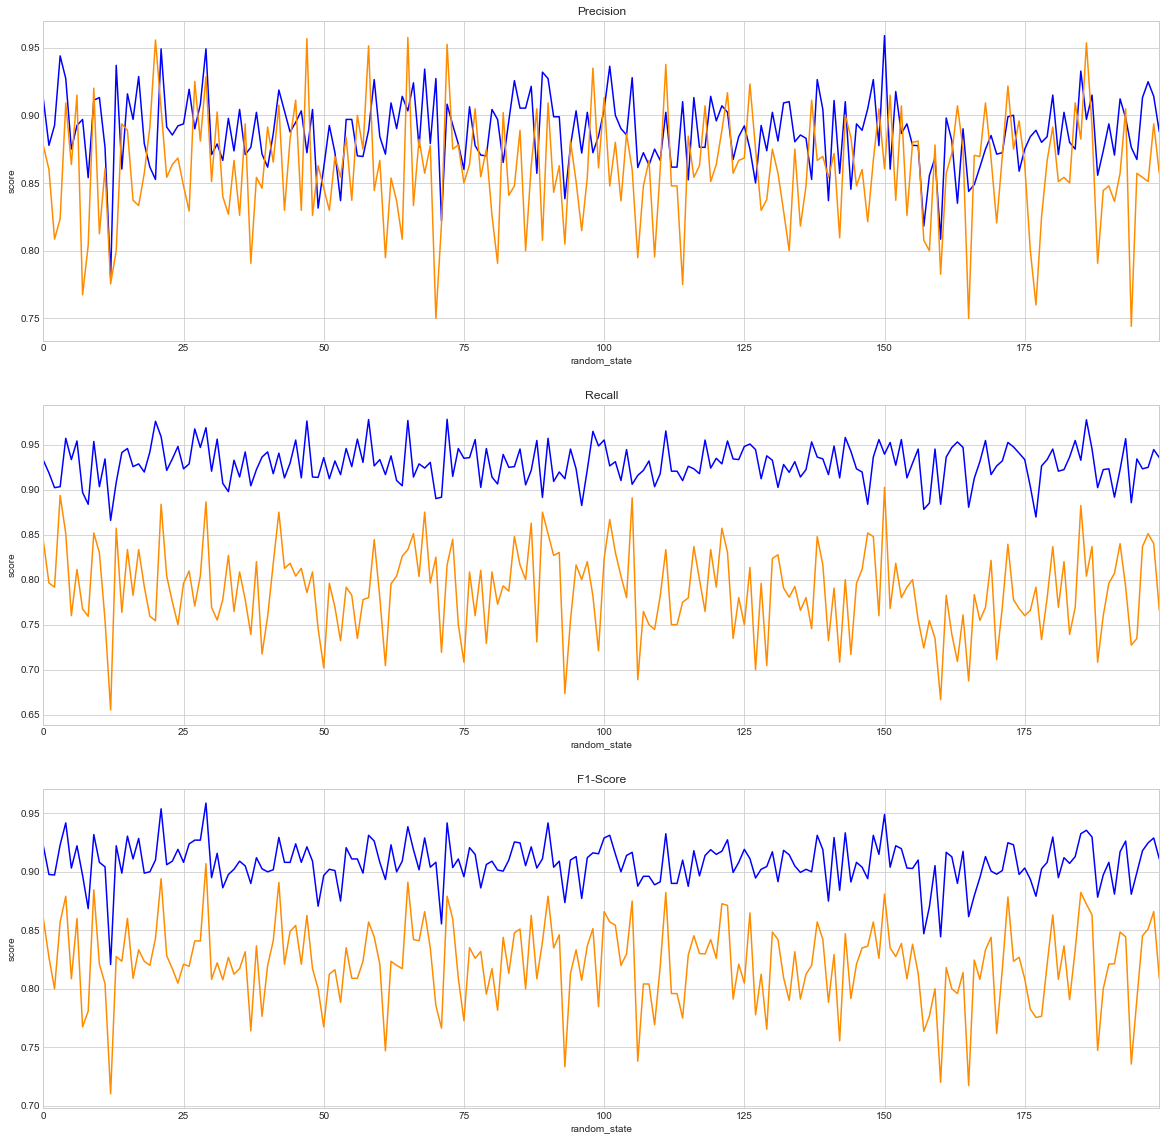

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
df['Precision_0'].plot(ax=ax1, color="blue")
df['Precision_1'].plot(ax=ax1, color="darkorange")

df['Recall_0'].plot(ax=ax2, color="blue")
df['Recall_1'].plot(ax=ax2, color="darkorange")

df['F1-Score_0'].plot(ax=ax3, color="blue")
df['F1-Score_1'].plot(ax=ax3, color="darkorange")

graphs = ['Precision', 'Recall', 'F1-Score']
axes = [ax1, ax2, ax3]

for i in range(0,3):
        axes[i].set_title(graphs[i])
        axes[i].set_xlabel('random_state')
        axes[i].set_ylabel('score')

It is observed the model fitting varies a lot with the value for the seed (random_state) selected while training the model.

### Selecting optimium model

Based on the values of f-1 score, precision and recall we shall sort the observations in descending order of the scores respectively.

In [51]:
top_random_state = df.sort_values(by=['F1-Score_0', 'F1-Score_1', 'Precision_0', 'Precision_1', 'Recall_0', 'Recall_1'], ascending=False).head().reset_index()
top_random_state.head()

,index,Precision_0,Precision_1,Recall_0,Recall_1,F1-Score_0,F1-Score_1,Support_0,Support_1
0,29,0.948980,0.928571,0.968750,0.886364,0.958763,0.906977,96,44
1,21,0.948980,0.904762,0.958763,0.883721,0.953846,0.894118,97,43
2,150,0.958763,0.860465,0.939394,0.902439,0.948980,0.880952,99,41
3,4,0.927083,0.909091,0.956989,0.851064,0.941799,0.879121,93,47
4,90,0.927083,0.909091,0.956989,0.851064,0.941799,0.879121,93,47


In [52]:
optimum_random_state = int(top_random_state.iloc[0]['index'])

We are selecting the top row in the dataset that has highest f-1 score, precison then followed by recall score

In [53]:
lg_optimum = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state = optimum_random_state)
lg_optimum.fit(X_train, y_train)
predictions = lg.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96        96
          1       0.93      0.89      0.91        44

avg / total       0.94      0.94      0.94       140



While the model shows exceptional score in the classification report it is most optimal one.

** Plotting confusion matrix **

We shall define a function to plot the confusion matrix visually

In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[93  3]
 [ 5 39]]
Normalized confusion matrix
[[ 0.96875     0.03125   ]
 [ 0.11363636  0.88636364]]


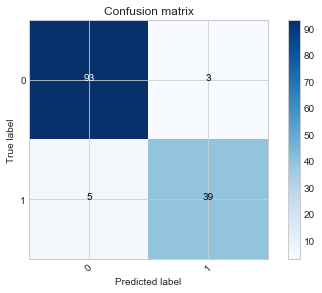

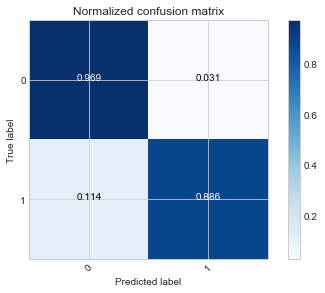

In [55]:
plt.gcf().clear()
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cnf_matrix, lg_optimum.classes_)
plt.figure()
plot_confusion_matrix(cnf_matrix, lg_optimum.classes_, normalize=True, title='Normalized confusion matrix')

### Odds Ratio

In [56]:
coeff_df = pd.DataFrame(np.exp(lg_optimum.coef_)[0],X.columns,columns=['Odds Ratio'])
coeff_df

,Odds Ratio
Gender_Female,0.766026
Gender_Male,1.073590
AgeGroups_21 - 40,0.451659
AgeGroups_41 - 60,5.966349
AgeGroups_<20,0.305184
EstSalaryBracket_1,0.608361
EstSalaryBracket_2,0.434955
EstSalaryBracket_3,0.229720
EstSalaryBracket_4,0.314241
EstSalaryBracket_5,0.293744


The odds ration greater than 1 have higher chance of purchasing the product. 

In [57]:
classify = ad_data[['Gender', 'Purchased', 'AgeGroups','EstSalaryBracket', 'SalaryBin']]

In [58]:
classify.head()

,Gender,Purchased,AgeGroups,EstSalaryBracket,SalaryBin
User ID,,,,,
15624510,Male,0,<20,1,"(14.999, 30.0]"
15810944,Male,0,21 - 40,1,"(14.999, 30.0]"
15668575,Female,0,21 - 40,2,"(30.0, 45.0]"
15603246,Female,0,21 - 40,3,"(45.0, 60.0]"
15804002,Male,0,<20,5,"(75.0, 90.0]"


### Clustering

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [60]:
classify_label = classify.apply(LabelEncoder().fit_transform)

In [61]:
kMeans = KMeans()
kMeans.fit(classify_label)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
set(kMeans.labels_)

{0, 1, 2, 3, 4, 5, 6, 7}

In [63]:
ad_data['Group'] = kMeans.labels_

In [64]:
ad_data.head()

,Gender,Age,EstimatedSalary,Purchased,AgeGroups,EstimatedSalary1000,EstSalaryBracket,SalaryBin,Group
User ID,,,,,,,,,
15624510,Male,19,19000,0,<20,19.0,1,"(14.999, 30.0]",6
15810944,Male,35,20000,0,21 - 40,20.0,1,"(14.999, 30.0]",6
15668575,Female,26,43000,0,21 - 40,43.0,2,"(30.0, 45.0]",0
15603246,Female,27,57000,0,21 - 40,57.0,3,"(45.0, 60.0]",2
15804002,Male,19,76000,0,<20,76.0,5,"(75.0, 90.0]",4
